# Problem 1

# 1.1

In [1]:
# Importing necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the csv file into panda dataset
zirconia_df=pd.read_csv('C:/Users/nicky/Downloads/cubic_zirconia.csv')

In [3]:
# Checking head of dataset
zirconia_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
#checking for shape 
zirconia_df.shape
print('Number of rows: ',zirconia_df.shape[0])
print('Number of columns: ',zirconia_df.shape[1])


Number of rows:  26967
Number of columns:  11


In [5]:
zirconia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
# Checking for null values
zirconia_df.isnull().sum()



Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
# checking for duplicates
zirconia_df.duplicated().sum()


0

In [8]:
zirconia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


Univariate Analysis

In [9]:
#Dropping Unnamed column from dataframe
zirconia_df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
zirconia_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


carat
skewness :1.116481
kurtosis :1.215364
depth
skewness :-0.028618
kurtosis :3.674431
table
skewness :0.765758
kurtosis :1.582166
x
skewness :0.387986
kurtosis :-0.657825
y
skewness :3.850189
kurtosis :159.291616
z
skewness :2.568257
kurtosis :87.006350
price
skewness :1.618550
kurtosis :2.148617


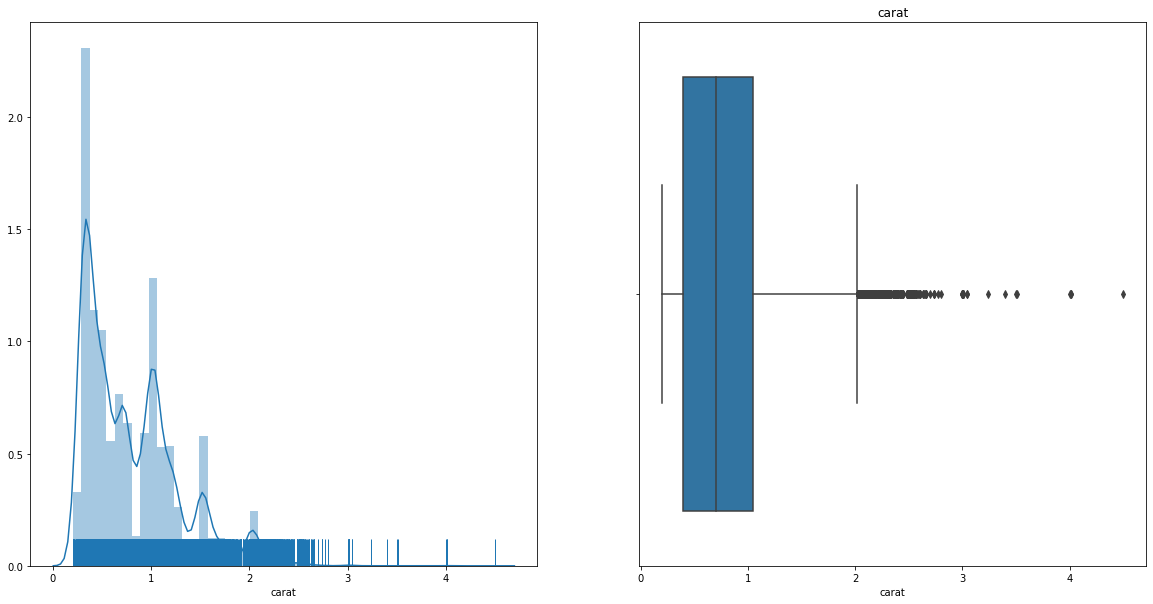

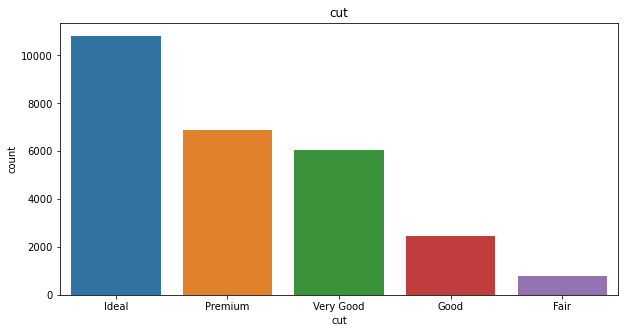

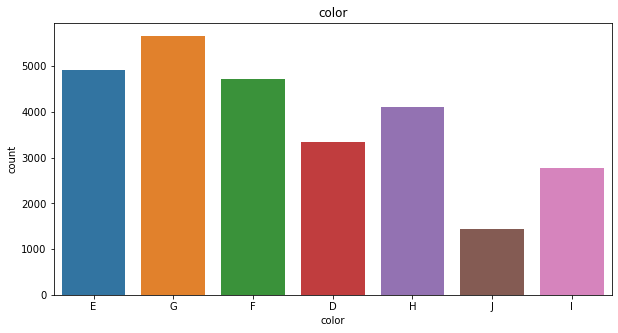

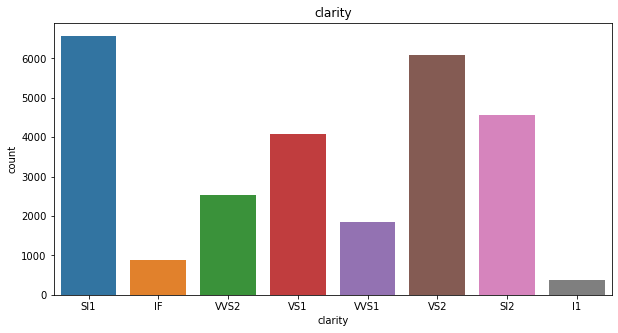

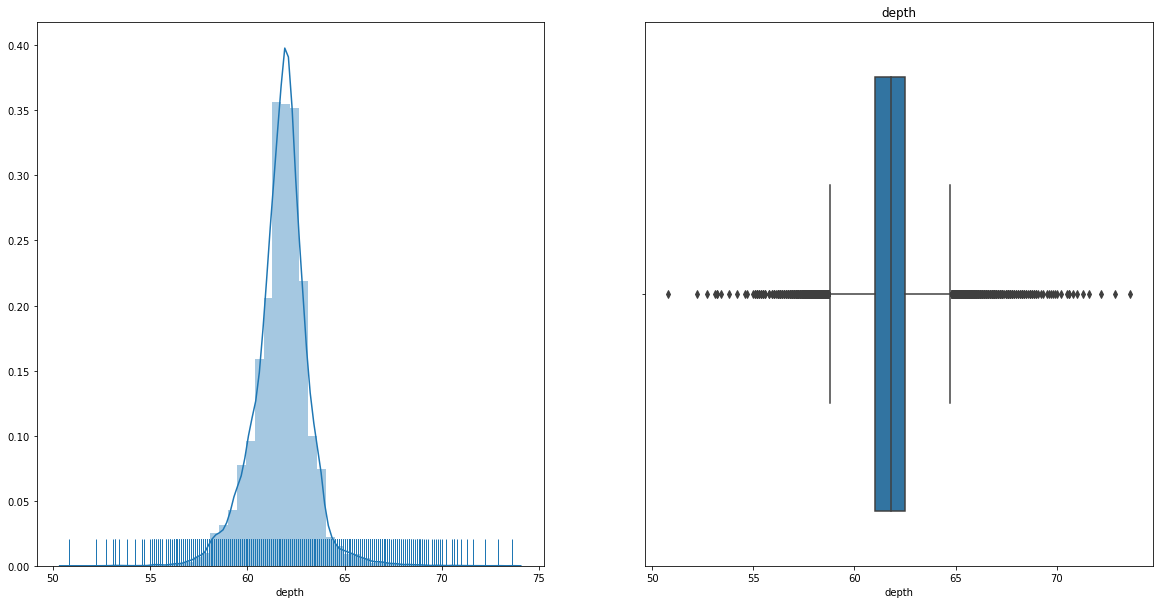

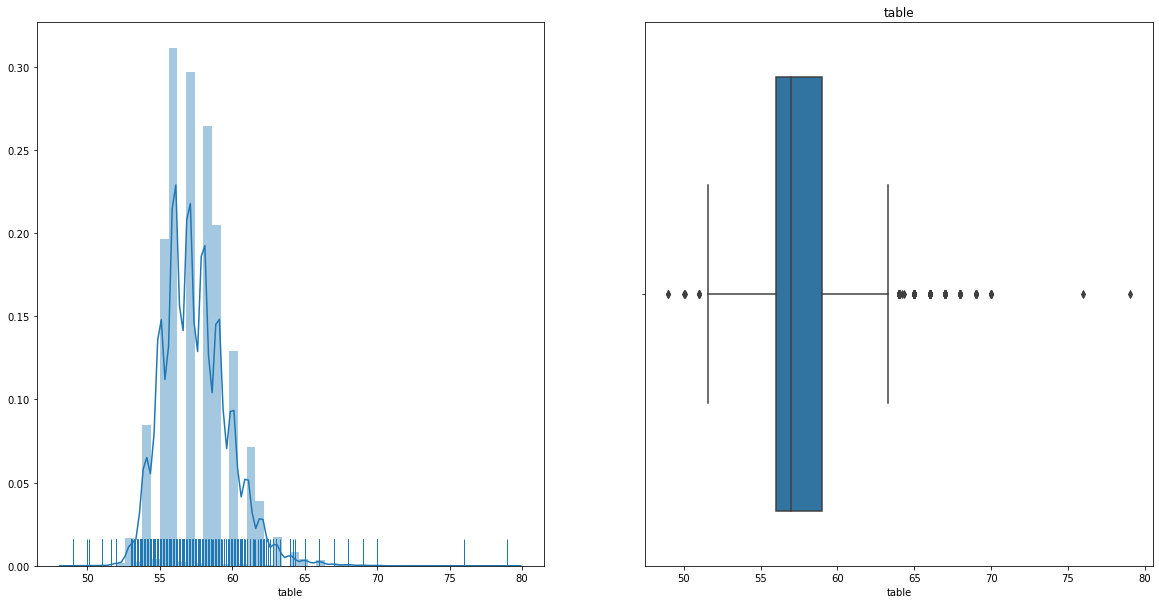

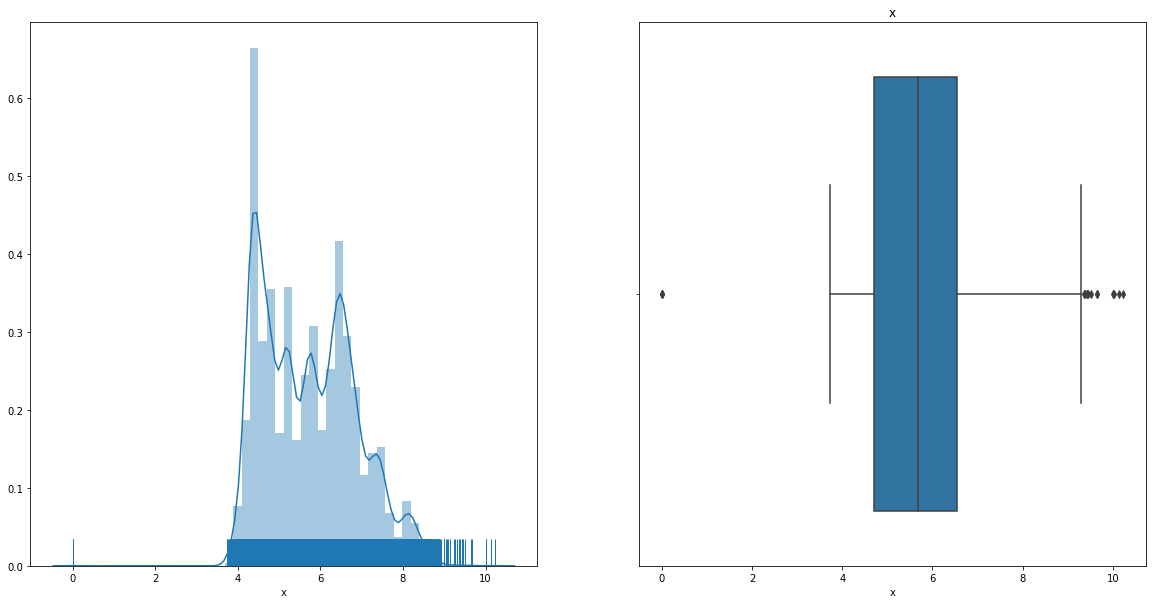

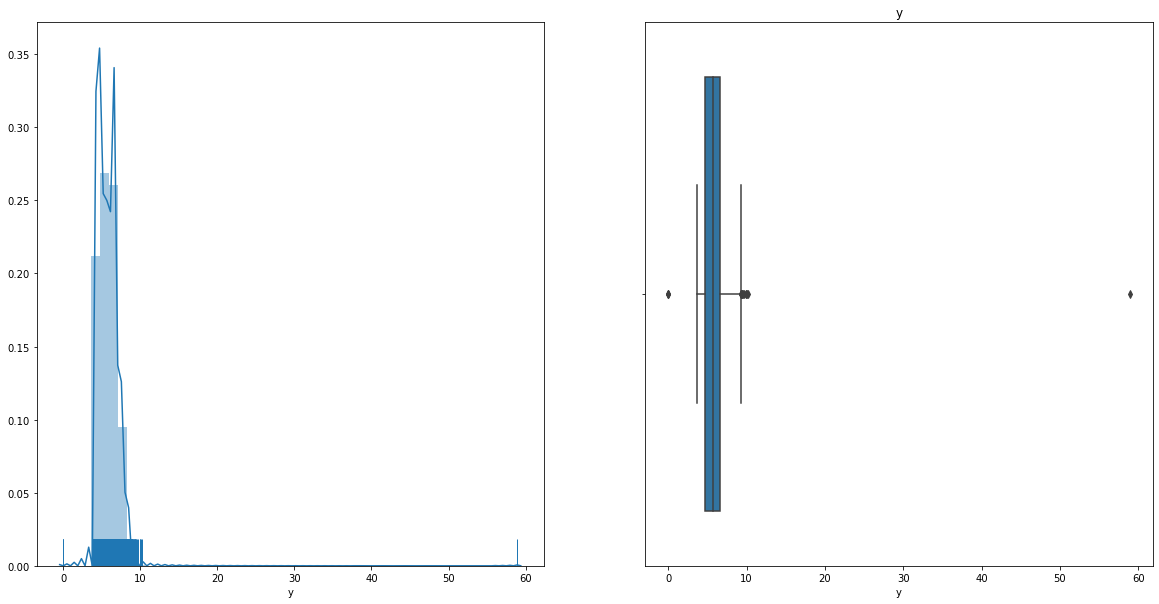

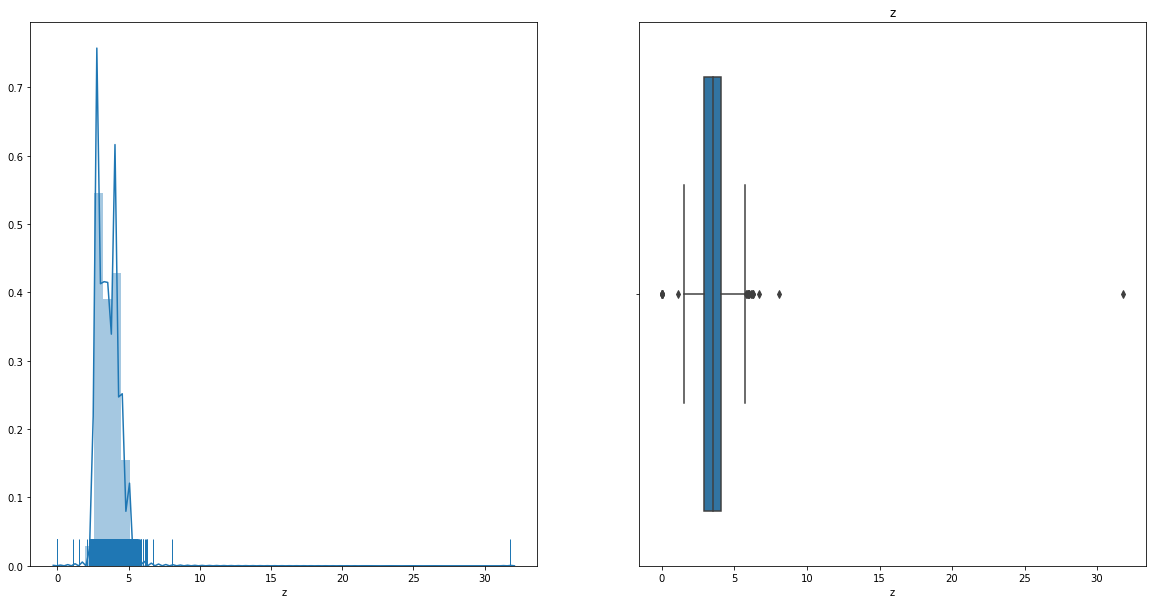

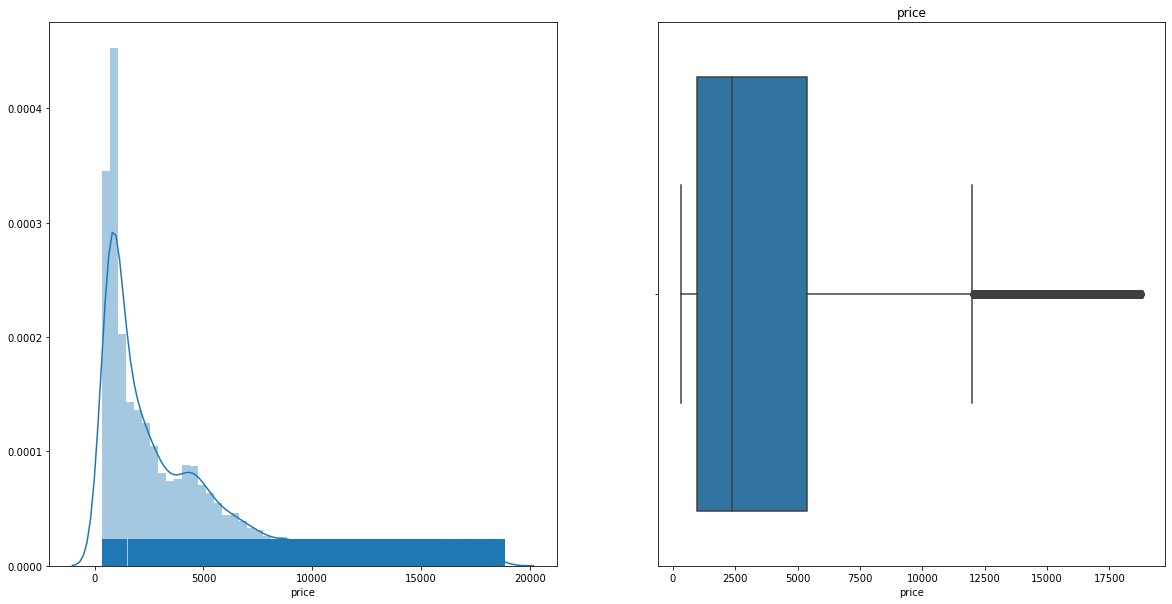

In [11]:
for columns in zirconia_df.columns:
   
    if zirconia_df[columns].dtype=='object':
        fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
        sns.countplot(zirconia_df[columns])
        plt.title(columns)
        
    else:
        fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
        sns.distplot(zirconia_df[columns],rug=True,ax=axes[0])
        plt.title(columns)
        sns.boxplot(zirconia_df[columns],ax=axes[1])
        plt.title(columns)
        print(columns)
        print('skewness :%f' % zirconia_df[columns].skew())
        print('kurtosis :%f' % zirconia_df[columns].kurt())

Treatment of outliers

In [12]:

def detect_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range


In [13]:
lr,ur=detect_outliers(zirconia_df['carat'])
print('lower range- ',lr,'upper range- ',ur)

lower range-  -0.5750000000000001 upper range-  2.0250000000000004


In [14]:
zirconia_df['carat']=np.where(zirconia_df['carat']>ur,ur,zirconia_df['carat'])
zirconia_df['carat']=np.where(zirconia_df['carat']<lr,lr,zirconia_df['carat'])

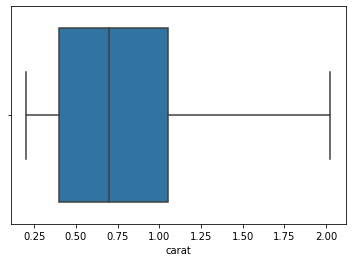

In [15]:
sns.boxplot(zirconia_df['carat']);

lower range-  nan upper range-  nan


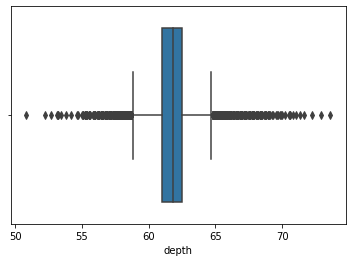

In [16]:
lr,ur=detect_outliers(zirconia_df['depth'])
print('lower range- ',lr,'upper range- ',ur)
zirconia_df['depth']=np.where(zirconia_df['depth']>ur,ur,zirconia_df['depth'])
zirconia_df['depth']=np.where(zirconia_df['depth']<lr,lr,zirconia_df['depth'])
sns.boxplot(zirconia_df['depth']);

lower range-  51.5 upper range-  63.5


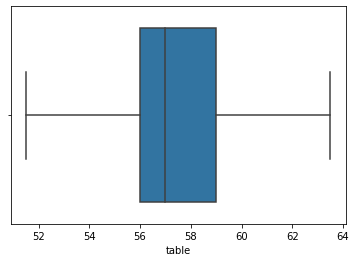

In [17]:
lr,ur=detect_outliers(zirconia_df['table'])
print('lower range- ',lr,'upper range- ',ur)
zirconia_df['table']=np.where(zirconia_df['table']>ur,ur,zirconia_df['table'])
zirconia_df['table']=np.where(zirconia_df['table']<lr,lr,zirconia_df['table'])
sns.boxplot(zirconia_df['table']);

lower range-  1.9500000000000002 upper range-  9.309999999999999


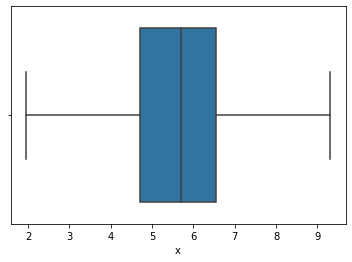

In [18]:
lr,ur=detect_outliers(zirconia_df['x'])
print('lower range- ',lr,'upper range- ',ur)
zirconia_df['x']=np.where(zirconia_df['x']>ur,ur,zirconia_df['x'])
zirconia_df['x']=np.where(zirconia_df['x']<lr,lr,zirconia_df['x'])
sns.boxplot(zirconia_df['x']);

lower range-  1.9649999999999999 upper range-  9.285


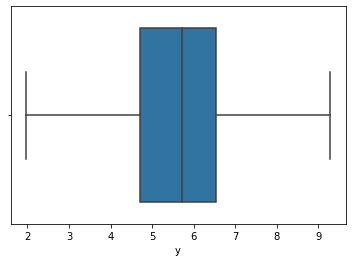

In [19]:
lr,ur=detect_outliers(zirconia_df['y'])
print('lower range- ',lr,'upper range- ',ur)
zirconia_df['y']=np.where(zirconia_df['y']>ur,ur,zirconia_df['y'])
zirconia_df['y']=np.where(zirconia_df['y']<lr,lr,zirconia_df['y'])
sns.boxplot(zirconia_df['y']);

lower range-  1.1899999999999997 upper range-  5.75


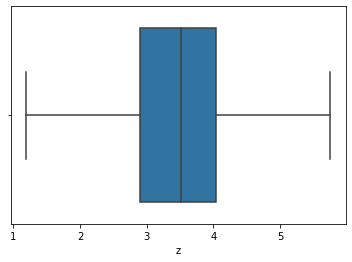

In [20]:
lr,ur=detect_outliers(zirconia_df['z'])
print('lower range- ',lr,'upper range- ',ur)
zirconia_df['z']=np.where(zirconia_df['z']>ur,ur,zirconia_df['z'])
zirconia_df['z']=np.where(zirconia_df['z']<lr,lr,zirconia_df['z'])
sns.boxplot(zirconia_df['z']);

lower range-  -5677.5 upper range-  11982.5


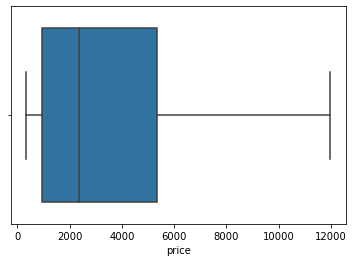

In [21]:
lr,ur=detect_outliers(zirconia_df['price'])
print('lower range- ',lr,'upper range- ',ur)
zirconia_df['price']=np.where(zirconia_df['price']>ur,ur,zirconia_df['price'])
zirconia_df['price']=np.where(zirconia_df['price']<lr,lr,zirconia_df['price'])
sns.boxplot(zirconia_df['price']);

Correction of standard deviation and kurtosis

skewness:  0.3907504047772467
kurtosis:  -0.7371282050887551


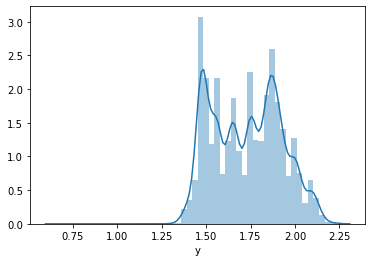

In [22]:
sns.distplot(np.log(zirconia_df['y']))
print('skewness: ',zirconia_df['y'].skew())
print('kurtosis: ',zirconia_df['y'].kurt())

skewness:  0.3841984513034232
kurtosis:  -0.7021997005623293


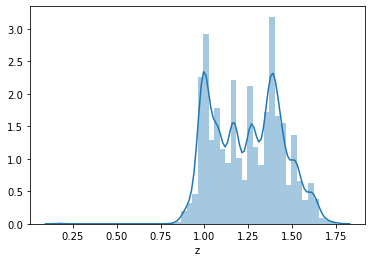

In [23]:
sns.distplot(np.log(zirconia_df['z']))
print('skewness: ',zirconia_df['z'].skew())
print('kurtosis: ',zirconia_df['z'].kurt())

skewness:  1.1581260980302321
kurtosis:  0.22944654110906315


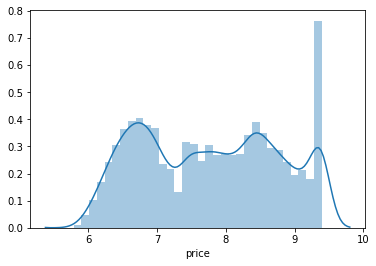

In [24]:
sns.distplot(np.log(zirconia_df['price']))
print('skewness: ',zirconia_df['price'].skew())
print('kurtosis: ',zirconia_df['price'].kurt())

Bivariate analysis

i)For continuous variables

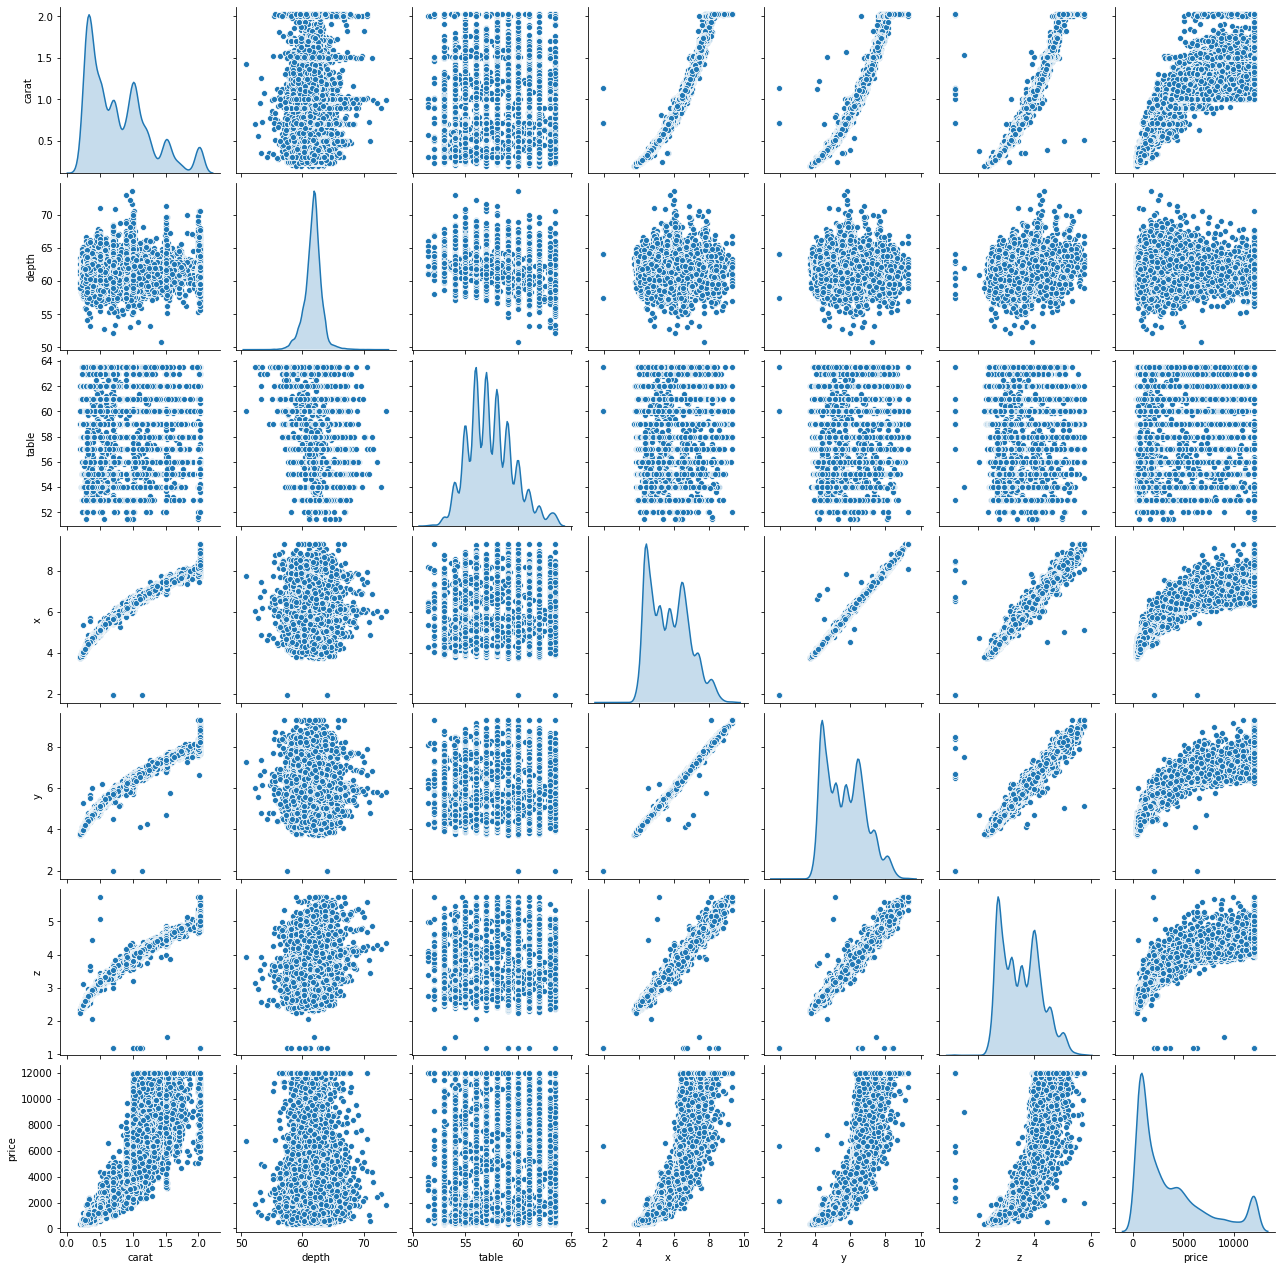

In [25]:
sns.pairplot(data=zirconia_df,diag_kind='kde');

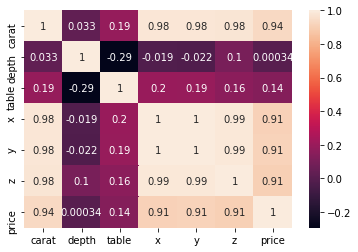

In [26]:
sns.heatmap(zirconia_df.corr(),annot=True);

ii) For categorical variables with target variables

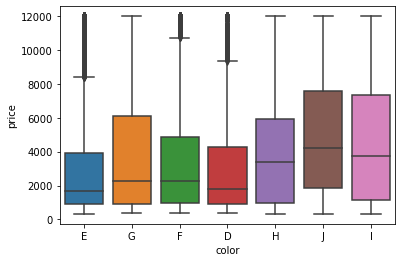

In [27]:
sns.boxplot(x='color',y='price',data=zirconia_df);


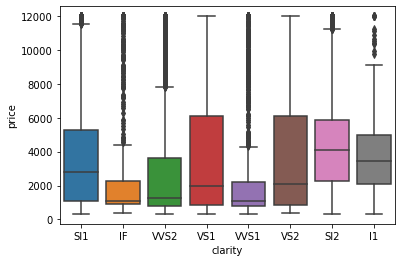

In [28]:
sns.boxplot(x='clarity',y='price',data=zirconia_df);

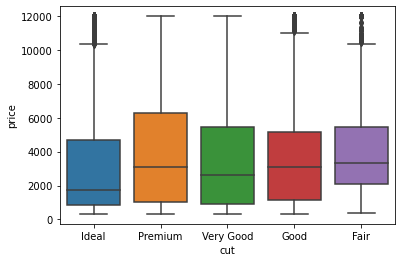

In [29]:
sns.boxplot(x='cut',y='price',data=zirconia_df);

# 1.2

Treatment of null values

In [30]:
zirconia_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

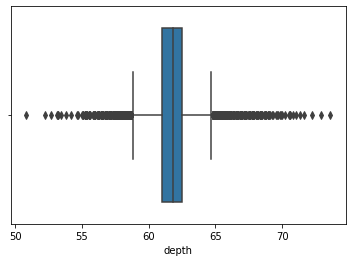

In [31]:
sns.boxplot(zirconia_df['depth']);

As there are outliers, replacing null values with median as mean value can affect outliers

In [32]:
zirconia_df['depth'].fillna(zirconia_df['depth'].median(),inplace=True)

In [33]:
#Checking null values after correction
zirconia_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

lower range-  59.0 upper range-  64.6


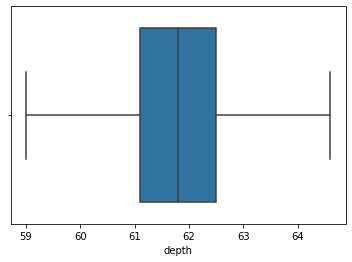

In [34]:
# Treatment of outlier of depth variable
lr,ur=detect_outliers(zirconia_df['depth'])
print('lower range- ',lr,'upper range- ',ur)
zirconia_df['depth']=np.where(zirconia_df['depth']>ur,ur,zirconia_df['depth'])
zirconia_df['depth']=np.where(zirconia_df['depth']<lr,lr,zirconia_df['depth'])
sns.boxplot(zirconia_df['depth']);

In [35]:
zirconia_df['depth'].describe().T

count    26967.000000
mean        61.750502
std          1.218929
min         59.000000
25%         61.100000
50%         61.800000
75%         62.500000
max         64.600000
Name: depth, dtype: float64

In [36]:
zirconia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.793593,0.462431,0.200,0.40,0.70,1.05,2.025
depth,26967.0,61.750502,1.218929,59.000,61.10,61.80,62.50,64.600
table,26967.0,57.435699,2.157125,51.500,56.00,57.00,59.00,63.500
x,26967.0,5.729903,1.127023,1.950,4.71,5.69,6.55,9.310
y,26967.0,5.731798,1.118970,1.965,4.71,5.71,6.54,9.285
z,26967.0,3.537261,0.697278,1.190,2.90,3.52,4.04,5.750
price,26967.0,3737.914136,3470.888236,326.000,945.00,2375.00,5360.00,11982.500


# 1.3

In [37]:
# Converting object data into numerical data
for features in zirconia_df.columns:
    if zirconia_df[features].dtype=='object':
        zirconia_df[features]=pd.Categorical(zirconia_df[features]).codes

In [38]:
zirconia_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779.0


In [39]:
from scipy.stats import zscore

In [40]:
# scaling data by using z score
std_df = pd.DataFrame(zscore(zirconia_df,ddof=1),columns=zirconia_df.columns)
np.round(std_df.head(6),2)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.07,-0.54,-0.94,-1.06,0.29,0.26,-1.30,-1.29,-1.26,-0.93
1,-1.00,0.43,0.23,-1.64,-0.78,0.26,-1.16,-1.14,-1.20,-0.79
2,0.23,1.41,-0.94,1.84,0.37,1.19,0.28,0.35,0.35,0.73
3,-0.81,-0.54,-0.36,0.10,-0.12,-0.67,-0.81,-0.83,-0.83,-0.77
4,-1.05,-0.54,-0.36,1.26,-1.11,0.73,-1.22,-1.16,-1.27,-0.85
5,0.49,-0.54,-1.53,0.68,-0.21,-0.67,0.65,0.68,0.65,1.66


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [42]:
# Dividing data into independent variable(y) and target variable(x)
x=std_df.drop('price',axis=1)

y=std_df.pop('price')

In [43]:
#split dataset into train and test set in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [44]:
data_train=pd.concat([x_train, y_train],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,-0.829514,-0.541477,1.403224,1.835733,0.450803,-0.665561,-0.851716,-0.895285,-0.827878,-0.771248
9728,1.981717,-0.541477,1.989393,-1.062979,0.861000,-0.201981,1.641579,1.624889,1.739247,0.743927
1936,-1.002513,-1.517807,-0.355284,-1.062979,0.040607,2.115918,-1.180014,-1.145515,-1.143390,-0.922506
26220,-0.202393,1.411184,0.817055,-1.062979,0.861000,-0.201981,-0.106389,-0.064164,0.003928,-0.439056
18445,-0.202393,-0.541477,-1.527622,-0.483237,0.286725,-0.665561,-0.053151,-0.019480,-0.010413,-0.335048


In [45]:
import statsmodels.formula.api as smf
lml=smf.ols(formula='price~carat+cut+color+clarity+depth+table+x+y+z',data=data_train).fit()
lml.params

Intercept    0.003396
carat        1.222836
cut          0.012308
color       -0.111959
clarity      0.123917
depth       -0.032412
table       -0.046825
x           -0.683735
y            0.515903
z           -0.051570
dtype: float64

In [46]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.129e+04
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:59:24   Log-Likelihood:                -4060.3
No. Observations:               18876   AIC:                             8141.
Df Residuals:                   18866   BIC:                             8219.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0034      0.002      1.555      0.1

In [47]:
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,-0.829514,-0.541477,1.403224,1.835733,0.450803,-0.665561,-0.851716,-0.895285,-0.827878,-0.771248
9728,1.981717,-0.541477,1.989393,-1.062979,0.861000,-0.201981,1.641579,1.624889,1.739247,0.743927
1936,-1.002513,-1.517807,-0.355284,-1.062979,0.040607,2.115918,-1.180014,-1.145515,-1.143390,-0.922506
26220,-0.202393,1.411184,0.817055,-1.062979,0.861000,-0.201981,-0.106389,-0.064164,0.003928,-0.439056
18445,-0.202393,-0.541477,-1.527622,-0.483237,0.286725,-0.665561,-0.053151,-0.019480,-0.010413,-0.335048


In [48]:
lml=smf.ols(formula='price~carat+cut+color+clarity+depth+table+x+y+z',data=data_test).fit()
lml.params

Intercept   -0.007930
carat        1.198601
cut          0.018157
color       -0.113015
clarity      0.130280
depth       -0.015869
table       -0.042107
x           -0.511395
y            0.490301
z           -0.181056
dtype: float64

In [49]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     8862.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:59:24   Log-Likelihood:                -1786.6
No. Observations:                8091   AIC:                             3593.
Df Residuals:                    8081   BIC:                             3663.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0079      0.003     -2.361      0.0

# Problem 2

# 2.1

In [50]:
holiday_df=pd.read_csv('C:/Users/nicky/Downloads/Holiday_Package.csv')

In [51]:
# Redaing dataset
holiday_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [52]:
#Cheking for shape
holiday_df.shape
print('Number of columns: ',holiday_df.shape[1])
print('Number of rows: ',holiday_df.shape[0])

Number of columns:  8
Number of rows:  872


In [53]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [54]:
#Checking for null values
holiday_df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [55]:
#Checking for duplicates
holiday_df.duplicated().sum()

0

In [56]:
# Summary statistics of the dataset
holiday_df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [57]:
# Dropping unnamed: 0 column
holiday_df.drop('Unnamed: 0',axis=1,inplace=True)


In [58]:
holiday_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


Univariate analysis

i)For continuous variables

skewness:  3.103215542323346
kurtosis:  15.852557381766497


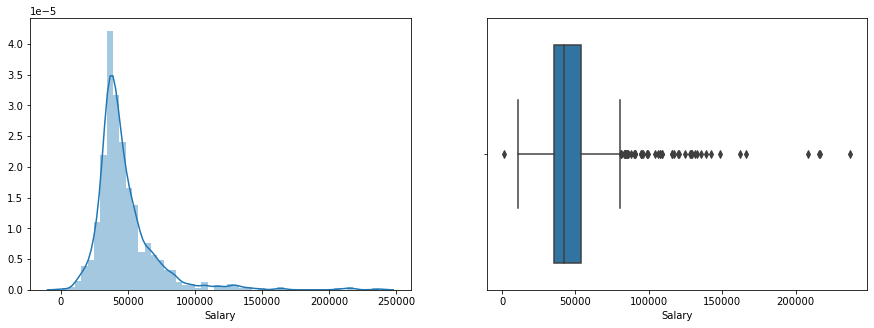

In [59]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.distplot(holiday_df['Salary'],ax=axes[0])
sns.boxplot(holiday_df['Salary'],ax=axes[1])
print('skewness: ',holiday_df['Salary'].skew())
print('kurtosis: ',holiday_df['Salary'].kurt())
                     

skewness:  0.1464120059496387
kurtosis:  -0.9099619032627548


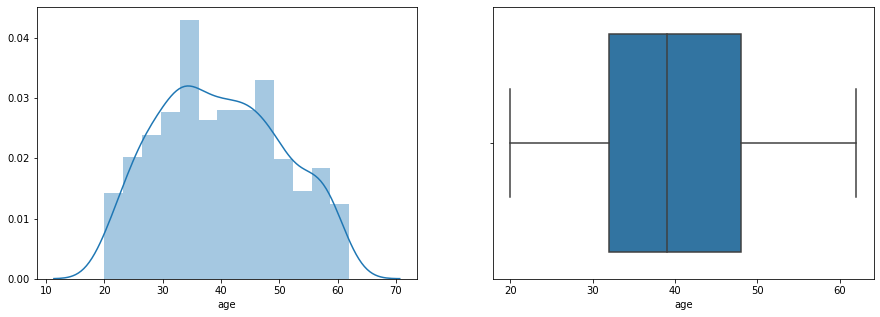

In [60]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.distplot(holiday_df['age'],ax=axes[0])
sns.boxplot(holiday_df['age'],ax=axes[1])
print('skewness: ',holiday_df['age'].skew())
print('kurtosis: ',holiday_df['age'].kurt())
                     

skewness:  -0.045501475549558336
kurtosis:  0.005557800972398663


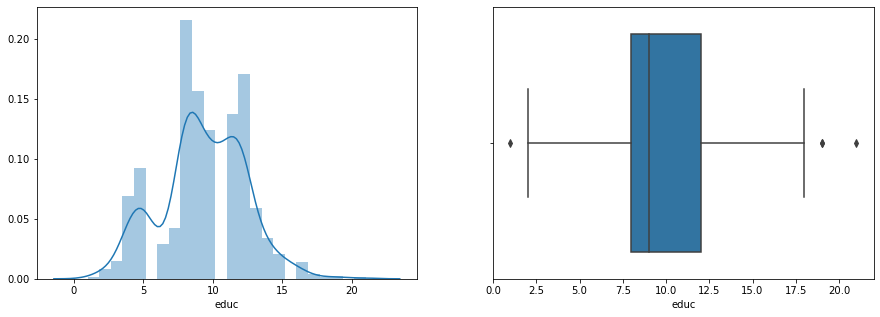

In [61]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.distplot(holiday_df['educ'],ax=axes[0])
sns.boxplot(holiday_df['educ'],ax=axes[1])
print('skewness: ',holiday_df['educ'].skew())
print('kurtosis: ',holiday_df['educ'].kurt())
                     

In [62]:
# Treatment of outliers
def detect_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [63]:
lr,ur=detect_outliers(holiday_df['Salary'])
print('lower range- ',lr,'upper range- ',ur)

lower range-  8105.75 upper range-  80687.75


In [64]:
holiday_df['Salary']=np.where(holiday_df['Salary']>ur,ur,holiday_df['Salary'])
holiday_df['Salary']=np.where(holiday_df['Salary']<lr,lr,holiday_df['Salary'])

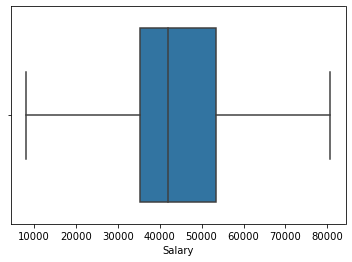

In [65]:
sns.boxplot(holiday_df['Salary']);

In [66]:
lr,ur=detect_outliers(holiday_df['educ'])
print('lower range- ',lr,'upper range- ',ur)

lower range-  2.0 upper range-  18.0


In [67]:
holiday_df['educ']=np.where(holiday_df['educ']>ur,ur,holiday_df['educ'])
holiday_df['educ']=np.where(holiday_df['educ']<lr,lr,holiday_df['educ'])

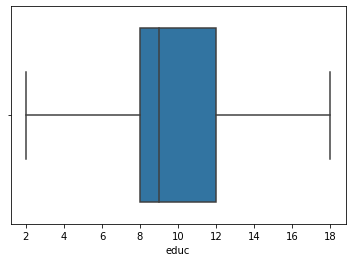

In [68]:
sns.boxplot(holiday_df['educ']);

ii) For catagorical variables

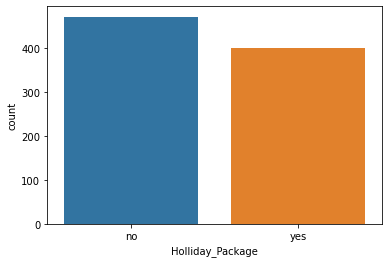

In [69]:
sns.countplot(holiday_df['Holliday_Package']);

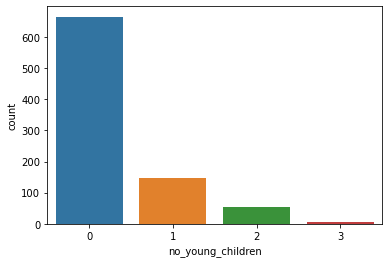

In [70]:
sns.countplot(holiday_df['no_young_children']);

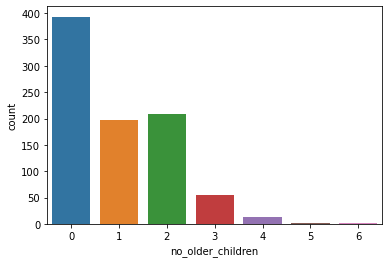

In [71]:
sns.countplot(holiday_df['no_older_children']);

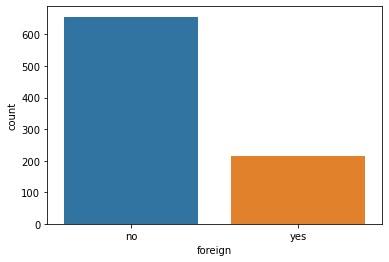

In [72]:
sns.countplot(holiday_df['foreign']);

Bivariate Analysis

i)For target and continuous varibles

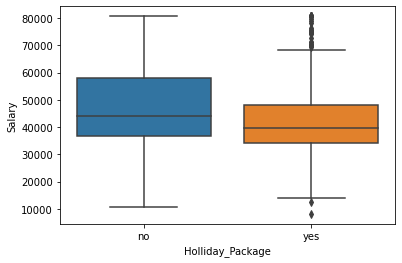

In [73]:
sns.boxplot(x=holiday_df['Holliday_Package'],y=holiday_df['Salary'])

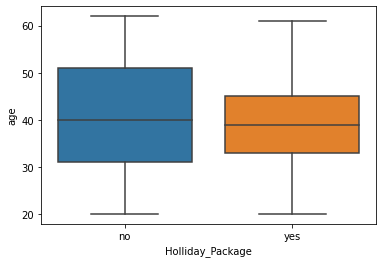

In [74]:
sns.boxplot(x=holiday_df['Holliday_Package'],y=holiday_df['age']);

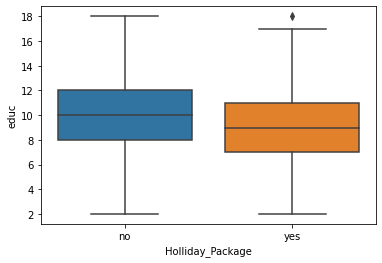

In [75]:
sns.boxplot(x=holiday_df['Holliday_Package'],y=holiday_df['educ']);

ii) For target and categorical variables

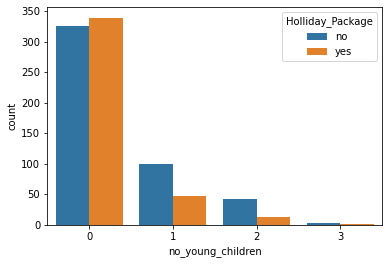

In [76]:
sns.countplot(x='no_young_children',hue='Holliday_Package',data=holiday_df);

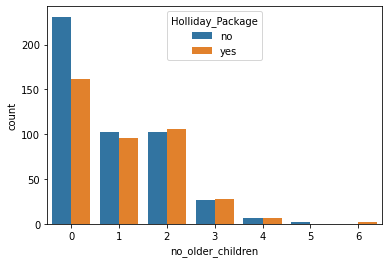

In [77]:
sns.countplot(x='no_older_children',hue='Holliday_Package',data=holiday_df);

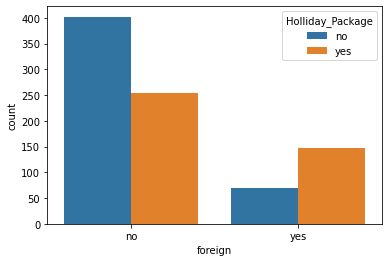

In [78]:
sns.countplot(x='foreign',hue='Holliday_Package',data=holiday_df);

iii) For continuous variables

C:\Users\nicky\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


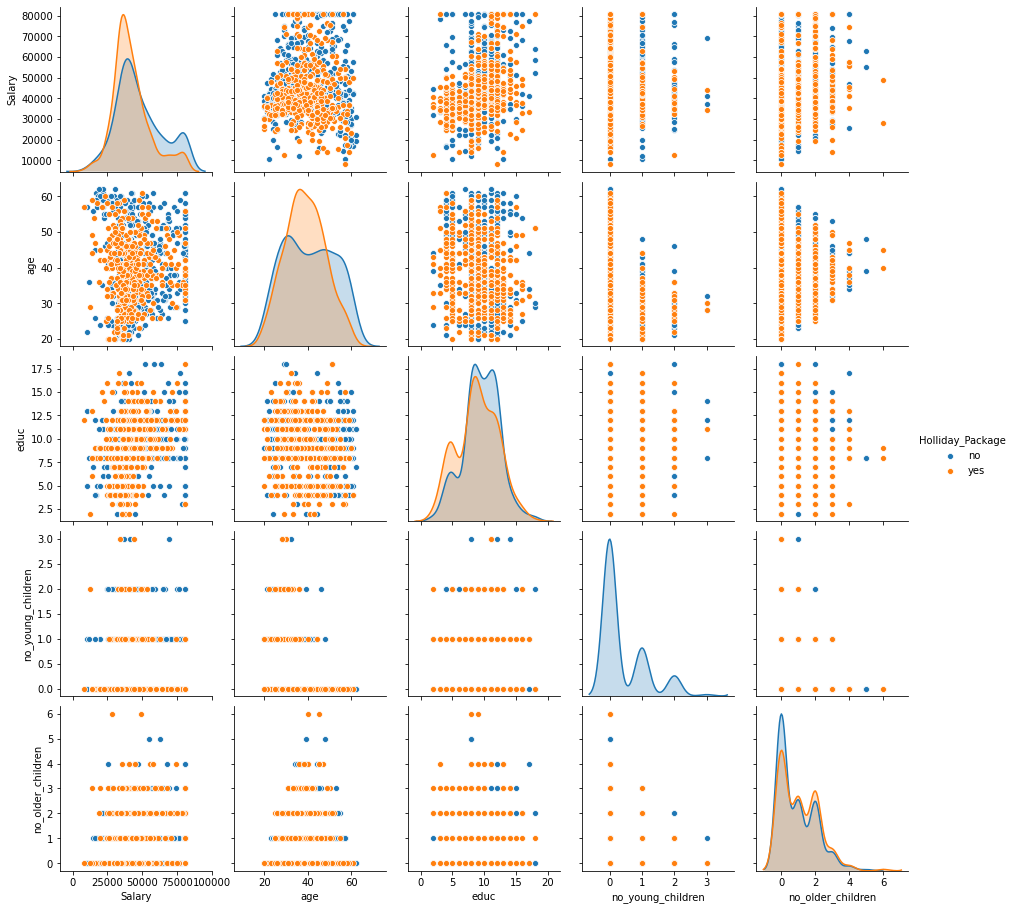

In [79]:
sns.pairplot(holiday_df,hue='Holliday_Package');

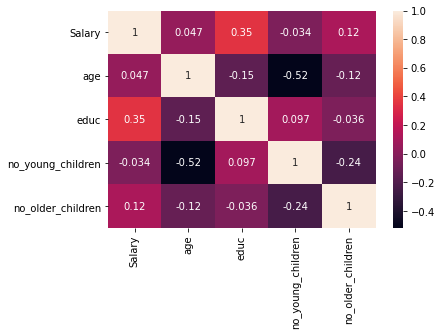

In [80]:
sns.heatmap(holiday_df.corr(),annot=True);

# 2.2


In [81]:
# Converting object data into numerical data
for features in holiday_df.columns:
    if holiday_df[features].dtype=='object':
        holiday_df[features]=pd.Categorical(holiday_df[features]).codes

In [82]:
holiday_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8.0,1,1,0
1,1,37207.0,45,8.0,0,1,0
2,0,58022.0,46,9.0,0,0,0
3,0,66503.0,31,11.0,2,0,0
4,0,66734.0,44,12.0,0,2,0


# 1. LogisticRegression Model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [84]:
# checking how target variable 'Holiday_package' is diatributed among other variables
holiday_df['Holliday_Package'].value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [85]:
x=holiday_df.drop('Holliday_Package',axis=1)

y=holiday_df.pop('Holliday_Package')

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [87]:
model=LogisticRegression()

In [88]:
lr_model=model.fit(x_train,y_train)


# 2. Linear Discriminant Analysis

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [90]:
model=LinearDiscriminantAnalysis()

In [91]:
lda_model=model.fit(x_train,y_train)

# 2.3

# 1 . Logistic Regression

In [92]:
ytest_predict1=lr_model.predict(x_test)
ytrain_predict1=lr_model.predict(x_train)

In [93]:
lr_model_score=lr_model.score(x_test,y_test)

Model score, Confusion matrix and Classification report of training and test set

In [94]:
#Model score
print(lr_model_score)

0.5534351145038168


In [95]:
#Confusion matrix of train set
print(metrics.confusion_matrix(y_train,ytrain_predict1))

[[326   0]
 [284   0]]


In [96]:
#Classification  report of train set
print(metrics.classification_report(y_train,ytrain_predict1))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610



C:\Users\nicky\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
#Confusion matrix of train set
print(metrics.confusion_matrix(y_test,ytest_predict1))


[[145   0]
 [117   0]]


In [98]:
#Classification report of test set
print(metrics.classification_report(y_test,ytest_predict1))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262



ROC_AUC_Score and ROC_Curve of training and testing data set

In [99]:
#Getting prabability of predicted class
ytrain_predict_score1=lr_model.predict_proba(x_train)
ytest_predict_score1=lr_model.predict_proba(x_test)

In [100]:
#keeping probability of psitive outcome of training set
probs1=ytrain_predict_score1[:,1]
probs1

array([0.46011846, 0.4622439 , 0.4063202 , 0.41575567, 0.46645314,
       0.46739714, 0.42239832, 0.41187517, 0.40632018, 0.45153314,
       0.44181607, 0.42940419, 0.44977282, 0.42497222, 0.44589259,
       0.45966321, 0.48356558, 0.45022647, 0.44840664, 0.45821734,
       0.4480998 , 0.40632018, 0.4543174 , 0.44501726, 0.47998223,
       0.40632019, 0.45959085, 0.46142274, 0.44842176, 0.46196936,
       0.46282338, 0.4477558 , 0.43528639, 0.44128998, 0.47388937,
       0.44681936, 0.4598348 , 0.45878789, 0.41822121, 0.40632019,
       0.4063202 , 0.44293132, 0.46827348, 0.43683038, 0.43106427,
       0.45445372, 0.41240463, 0.44906698, 0.45214656, 0.44603657,
       0.45491049, 0.41817204, 0.44974376, 0.42164175, 0.44926348,
       0.45687128, 0.4516309 , 0.42326308, 0.45645734, 0.4830938 ,
       0.42740065, 0.42640034, 0.44748737, 0.44826368, 0.46122303,
       0.44219626, 0.45008571, 0.46238992, 0.40632018, 0.44145683,
       0.4171536 , 0.45010198, 0.44338128, 0.46280701, 0.45530

In [101]:
#Roc_auc_score of training set
lr_train_auc=metrics.roc_auc_score(y_train,probs1)
lr_train_auc

0.590966041648665

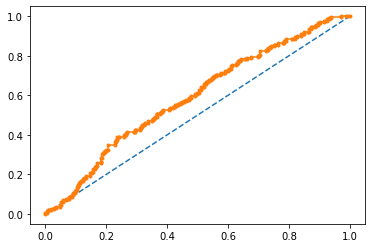

In [102]:
#ROC curve of training set
lr_train_fpr,lr_train_tpr,thresholds=metrics.roc_curve(y_train,probs1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_train_fpr,lr_train_tpr,marker='.')
plt.show()

In [103]:
#keeping probability of psitive outcome of testing set
probs2=ytest_predict_score1[:,1]
probs2

array([0.41326245, 0.4571465 , 0.45240269, 0.4063202 , 0.46696547,
       0.42012513, 0.40632019, 0.43889748, 0.40632019, 0.43224949,
       0.41989845, 0.4335059 , 0.42249579, 0.46503469, 0.46727313,
       0.45666604, 0.46303835, 0.41962261, 0.46035546, 0.42461509,
       0.4658181 , 0.45271937, 0.44581596, 0.46959717, 0.46834371,
       0.45541047, 0.43772428, 0.4518148 , 0.46141107, 0.45937493,
       0.45620666, 0.45566923, 0.48080928, 0.45989785, 0.44618869,
       0.4642117 , 0.44029604, 0.44403205, 0.45858604, 0.4474746 ,
       0.445297  , 0.45553402, 0.44539102, 0.46123589, 0.46966389,
       0.45545127, 0.46744862, 0.46785928, 0.46662858, 0.46213875,
       0.45166698, 0.45709636, 0.45453995, 0.45111651, 0.45903297,
       0.40632019, 0.4577857 , 0.4375369 , 0.44351584, 0.46610695,
       0.45261341, 0.4063202 , 0.40632019, 0.44473291, 0.46499145,
       0.45737394, 0.47550073, 0.44887863, 0.4586327 , 0.40740414,
       0.43617032, 0.44458436, 0.42126933, 0.40632019, 0.45655

In [104]:
#Roc_auc_score of training set
lr_test_auc=metrics.roc_auc_score(y_test,probs2)
lr_test_auc

0.6329501915708813

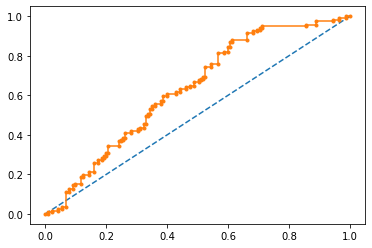

In [105]:
#ROC curve of training set
lr_test_fpr,lr_test_tpr,thresholds=metrics.roc_curve(y_test,probs2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_test_fpr,lr_test_tpr,marker='.')
plt.show()

# 2. Linear Discriminant Analysis

In [106]:
ytrain_predict2=lda_model.predict(x_train)
ytest_predict2=lda_model.predict(x_test)

Model score, Confusion matrix and Classification report of training and testing data set

In [107]:
#Model score
lda_model_score=lda_model.score(x_test,y_test)
print(lda_model_score)

0.6374045801526718


In [108]:
# Confusion matrix of training set
print(metrics.confusion_matrix(y_train,ytrain_predict2))

[[254  72]
 [126 158]]


In [109]:
# Classification report of training set
print(metrics.classification_report(y_train,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [110]:
# Confusion matrix of testing data set
print(metrics.confusion_matrix(y_test,ytest_predict2))

[[102  43]
 [ 52  65]]


In [111]:
# Classification report of testing data set
print(metrics.classification_report(y_test,ytest_predict2))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



ROC_AUC_Score and ROC_Curve of training and testing data set

In [112]:
#Getting prabability of predicted class
ytrain_predict_score2=lda_model.predict_proba(x_train)
ytest_predict_score2=lda_model.predict_proba(x_test)

In [113]:
#keeping probability of psitive outcome of training set
probs3=ytrain_predict_score2[:,1]
probs1

array([0.46011846, 0.4622439 , 0.4063202 , 0.41575567, 0.46645314,
       0.46739714, 0.42239832, 0.41187517, 0.40632018, 0.45153314,
       0.44181607, 0.42940419, 0.44977282, 0.42497222, 0.44589259,
       0.45966321, 0.48356558, 0.45022647, 0.44840664, 0.45821734,
       0.4480998 , 0.40632018, 0.4543174 , 0.44501726, 0.47998223,
       0.40632019, 0.45959085, 0.46142274, 0.44842176, 0.46196936,
       0.46282338, 0.4477558 , 0.43528639, 0.44128998, 0.47388937,
       0.44681936, 0.4598348 , 0.45878789, 0.41822121, 0.40632019,
       0.4063202 , 0.44293132, 0.46827348, 0.43683038, 0.43106427,
       0.45445372, 0.41240463, 0.44906698, 0.45214656, 0.44603657,
       0.45491049, 0.41817204, 0.44974376, 0.42164175, 0.44926348,
       0.45687128, 0.4516309 , 0.42326308, 0.45645734, 0.4830938 ,
       0.42740065, 0.42640034, 0.44748737, 0.44826368, 0.46122303,
       0.44219626, 0.45008571, 0.46238992, 0.40632018, 0.44145683,
       0.4171536 , 0.45010198, 0.44338128, 0.46280701, 0.45530

In [114]:
#Roc_auc_score of training set
lda_train_auc=metrics.roc_auc_score(y_train,probs3)
lda_train_auc

0.7394690227253089

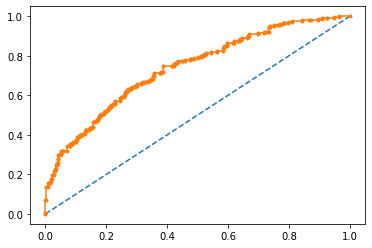

In [115]:
#ROC curve of training set
lda_train_fpr,lda_train_tpr,thresholds=metrics.roc_curve(y_train,probs3)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_train_fpr,lda_train_tpr,marker='.')
plt.show()

In [116]:
#keeping probability of psitive outcome of testing set
probs4=ytest_predict_score1[:,1]
probs4

array([0.41326245, 0.4571465 , 0.45240269, 0.4063202 , 0.46696547,
       0.42012513, 0.40632019, 0.43889748, 0.40632019, 0.43224949,
       0.41989845, 0.4335059 , 0.42249579, 0.46503469, 0.46727313,
       0.45666604, 0.46303835, 0.41962261, 0.46035546, 0.42461509,
       0.4658181 , 0.45271937, 0.44581596, 0.46959717, 0.46834371,
       0.45541047, 0.43772428, 0.4518148 , 0.46141107, 0.45937493,
       0.45620666, 0.45566923, 0.48080928, 0.45989785, 0.44618869,
       0.4642117 , 0.44029604, 0.44403205, 0.45858604, 0.4474746 ,
       0.445297  , 0.45553402, 0.44539102, 0.46123589, 0.46966389,
       0.45545127, 0.46744862, 0.46785928, 0.46662858, 0.46213875,
       0.45166698, 0.45709636, 0.45453995, 0.45111651, 0.45903297,
       0.40632019, 0.4577857 , 0.4375369 , 0.44351584, 0.46610695,
       0.45261341, 0.4063202 , 0.40632019, 0.44473291, 0.46499145,
       0.45737394, 0.47550073, 0.44887863, 0.4586327 , 0.40740414,
       0.43617032, 0.44458436, 0.42126933, 0.40632019, 0.45655

In [117]:
#Roc_auc_score of testing set
lda_test_auc=metrics.roc_auc_score(y_test,probs4)
lda_test_auc

0.6329501915708813

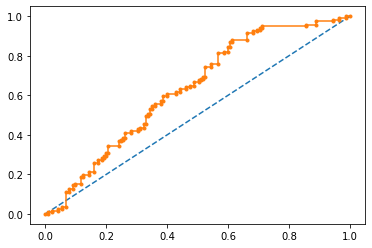

In [118]:
#ROC curve of training set
lda_test_fpr,lda_test_tpr,thresholds=metrics.roc_curve(y_test,probs4)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_test_fpr,lda_test_tpr,marker='.')
plt.show()

Comparision of ROC_Curve of 2 models on training data set

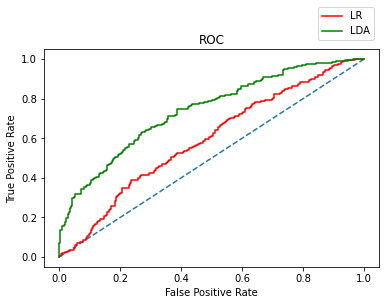

In [119]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label='LR')
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Comparision of ROC_Curve of 2 models on Test data set

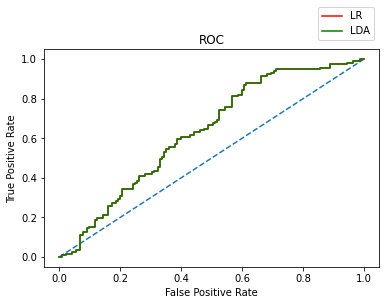

In [120]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label='LR')
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')